In [1]:
import pandas as pd
from pycaret.classification import *

In [16]:
trust_data = pd.read_csv("dataset_32k.csv")
print (trust_data.head())

      sensor1     sensor2     sensor3     trustclass
0  CT_range_1  CU_range_4  LT_range_4    trustworthy
1  CT_range_1  CU_range_4  LT_range_1  untrustworthy
2  CT_range_4  CU_range_1  LT_range_1    trustworthy
3  CT_range_1  CU_range_1  LT_range_1    trustworthy
4  CT_range_1  CU_range_1  LT_range_1    trustworthy


In [17]:
clf1 = setup(data = trust_data, target = 'trustclass')

,Description,Value
0,session_id,5978
1,Target,trustclass
2,Target Type,Binary
3,Label Encoded,"trustworthy: 0, untrustworthy: 1"
4,Original Data,"(32000, 4)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best_model = compare_models(round =2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.82,0.89,0.67,0.75,0.70,0.57,0.57,0.01
rf,Random Forest Classifier,0.82,0.89,0.67,0.75,0.71,0.57,0.58,0.16
gbc,Gradient Boosting Classifier,0.82,0.89,0.67,0.75,0.70,0.57,0.57,0.10
et,Extra Trees Classifier,0.82,0.89,0.67,0.75,0.70,0.57,0.57,0.14
xgboost,Extreme Gradient Boosting,0.82,0.89,0.67,0.75,0.70,0.57,0.57,0.13
lightgbm,Light Gradient Boosting Machine,0.82,0.89,0.67,0.75,0.70,0.57,0.57,0.02
catboost,CatBoost Classifier,0.82,0.89,0.67,0.75,0.70,0.57,0.57,1.06
svm,SVM - Linear Kernel,0.81,0.00,0.68,0.73,0.71,0.57,0.57,0.02
lr,Logistic Regression,0.80,0.88,0.61,0.75,0.67,0.53,0.54,0.03
ridge,Ridge Classifier,0.80,0.00,0.62,0.74,0.67,0.53,0.54,0.01


In [9]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8903, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [22]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
bm = create_model('lightgbm', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.83,0.90,0.68,0.76,0.72,0.59,0.59
1,0.82,0.89,0.64,0.76,0.70,0.57,0.57
2,0.80,0.88,0.63,0.73,0.68,0.54,0.54
3,0.82,0.89,0.67,0.75,0.71,0.58,0.58
4,0.82,0.89,0.67,0.75,0.71,0.58,0.58
5,0.82,0.89,0.65,0.77,0.70,0.57,0.58
6,0.82,0.89,0.66,0.75,0.70,0.57,0.57
7,0.82,0.90,0.70,0.74,0.72,0.59,0.59
8,0.82,0.89,0.69,0.73,0.71,0.58,0.58


In [55]:
print(bm)
plot_model(bm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [20]:
tuned_bm = tune_model(bm, optimize='Accuracy', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.83,0.90,0.68,0.76,0.72,0.59,0.59
1,0.82,0.89,0.64,0.76,0.70,0.57,0.57
2,0.80,0.88,0.63,0.73,0.68,0.54,0.54
3,0.82,0.89,0.67,0.75,0.71,0.58,0.58
4,0.82,0.89,0.67,0.75,0.71,0.58,0.58
5,0.82,0.90,0.65,0.77,0.70,0.57,0.58
6,0.82,0.89,0.66,0.75,0.70,0.57,0.57
7,0.82,0.90,0.70,0.74,0.72,0.59,0.59
8,0.82,0.89,0.69,0.73,0.71,0.58,0.58


In [56]:
print(tuned_bm)
plot_model(tuned_bm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.5
max_depth,-1
min_child_samples,96
min_child_weight,0.001
min_split_gain,0.8
n_estimators,50


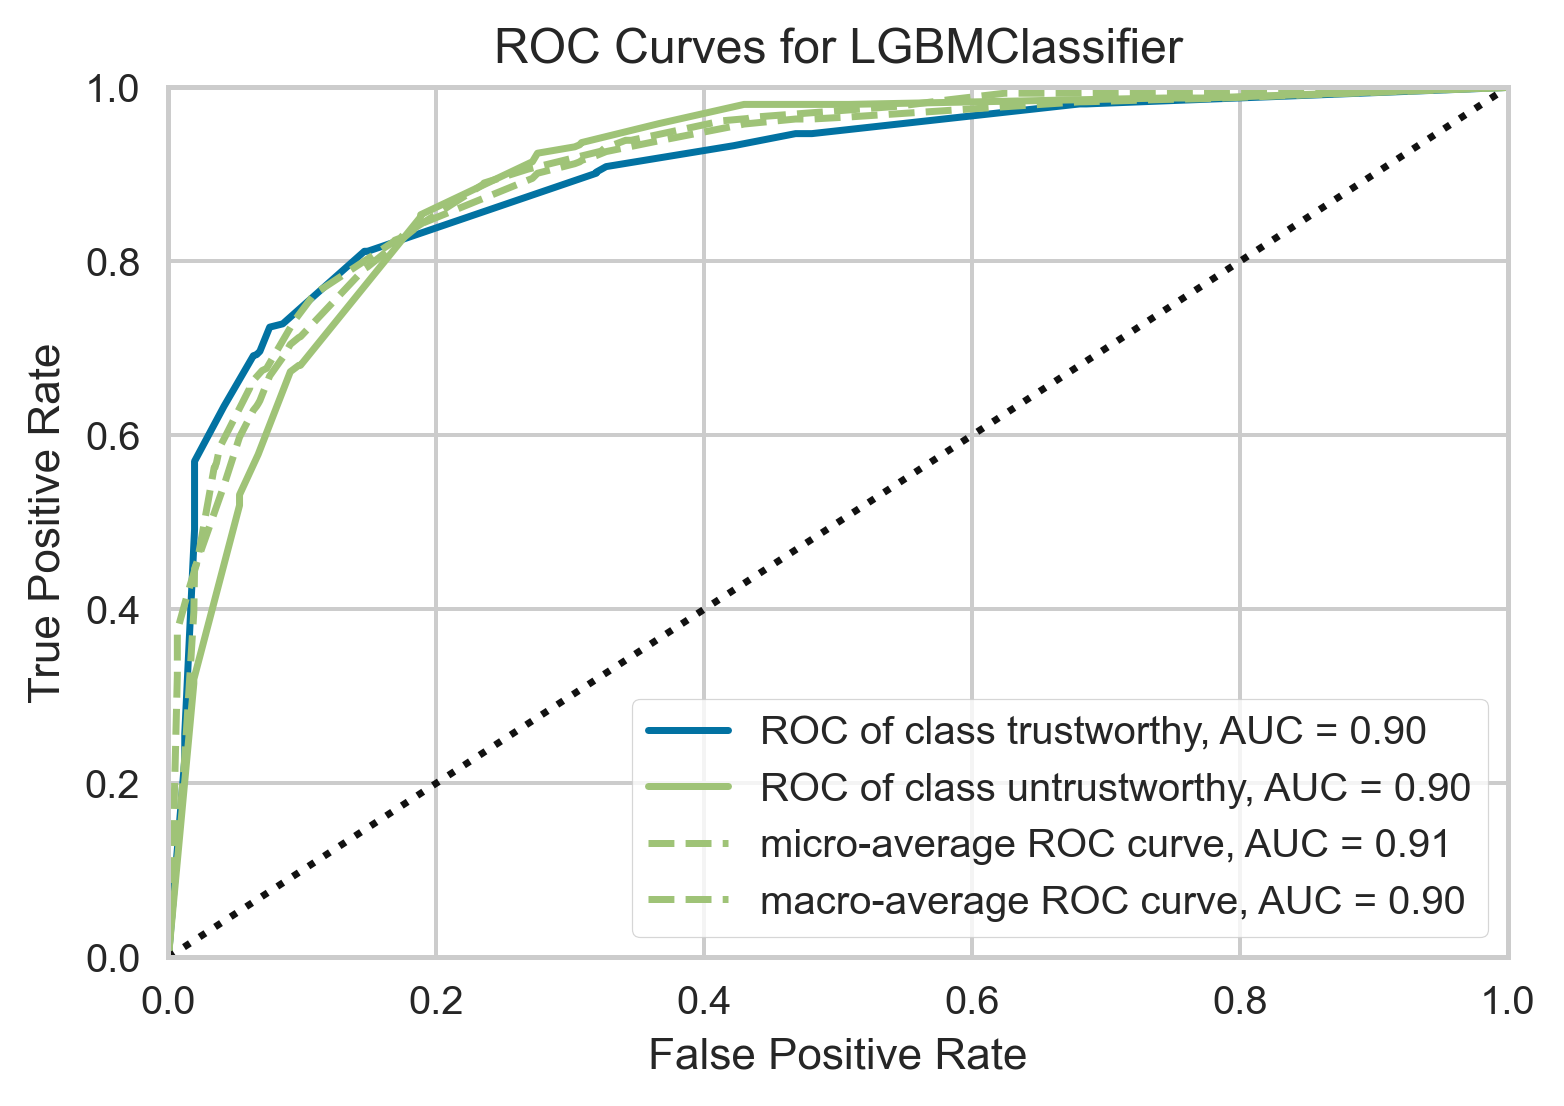

In [85]:
plot_model(tuned_bm, plot = 'auc', scale=4)

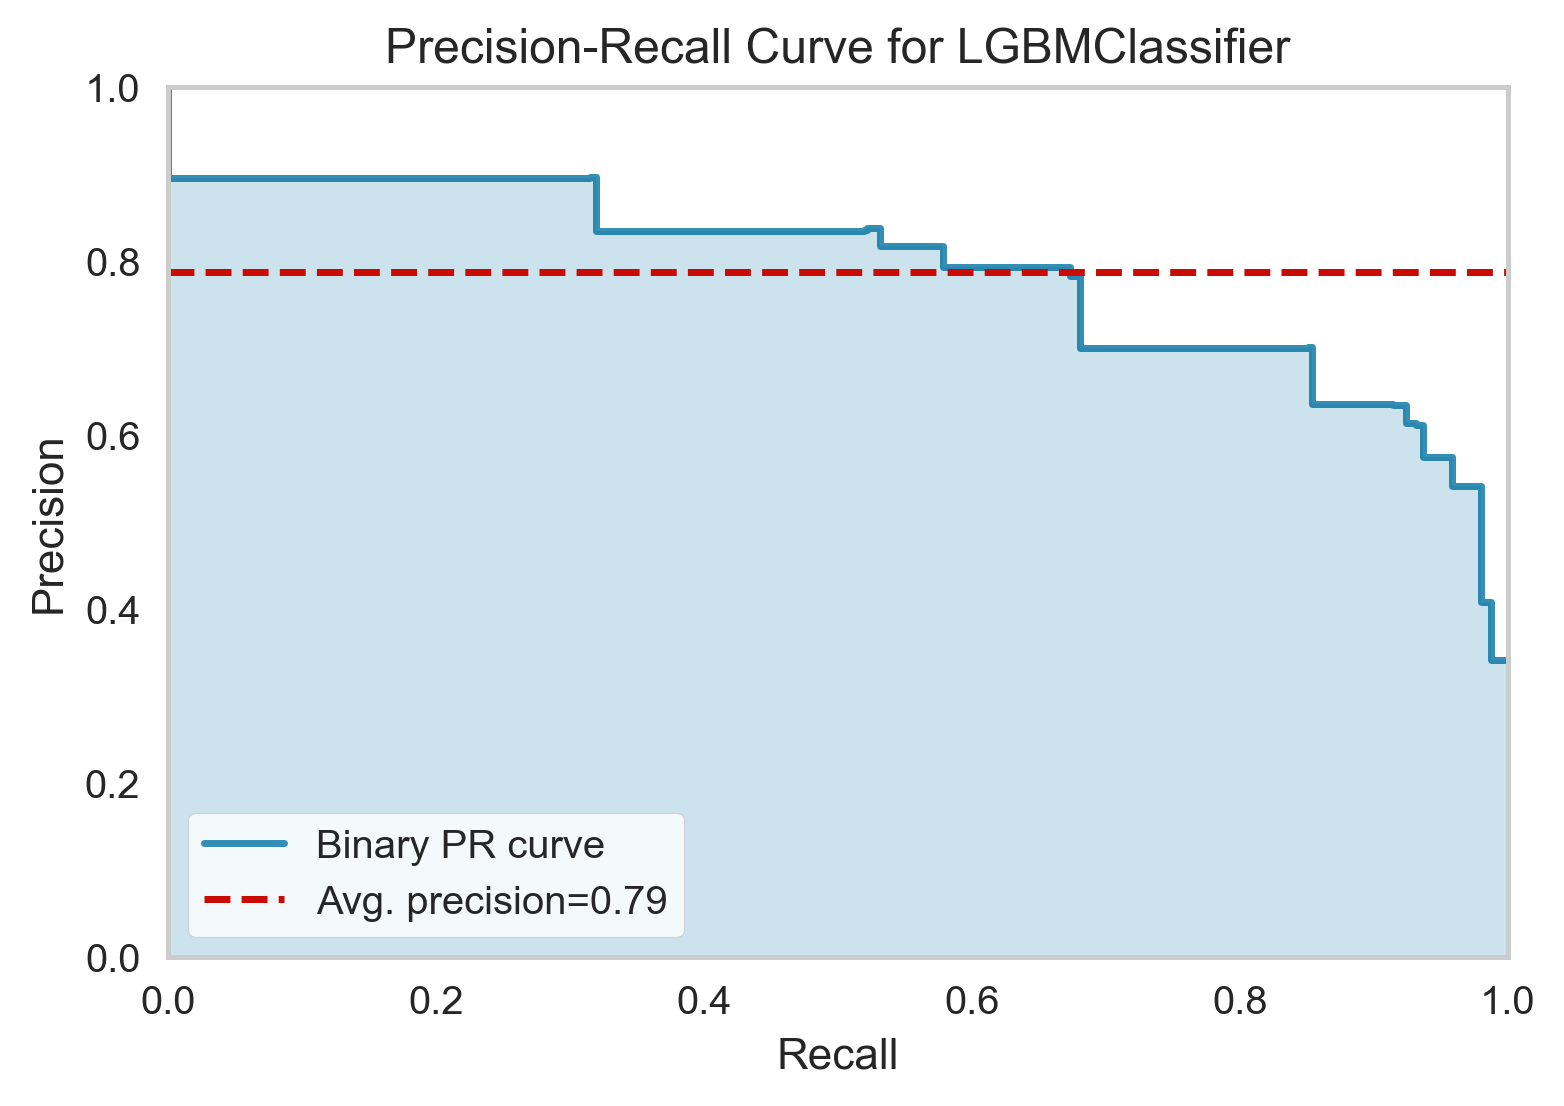

In [86]:
plot_model(tuned_bm, plot = 'pr', scale=4)

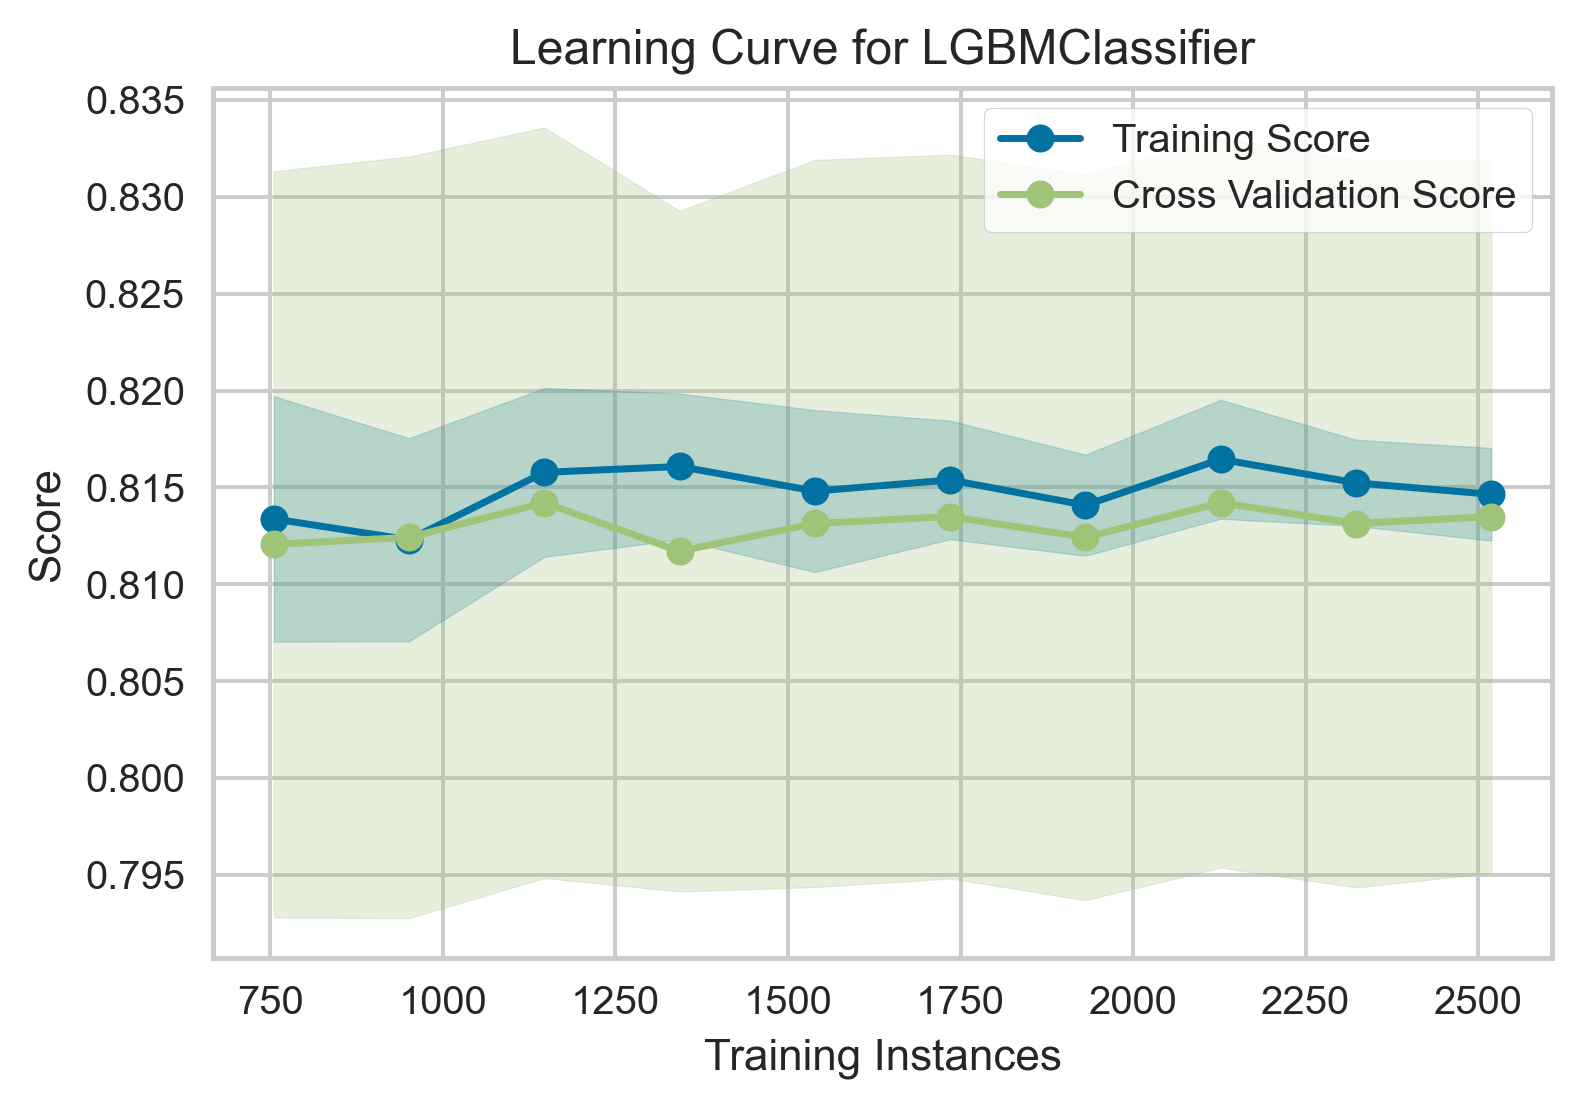

In [87]:
plot_model(tuned_bm, plot = 'learning',scale=4)

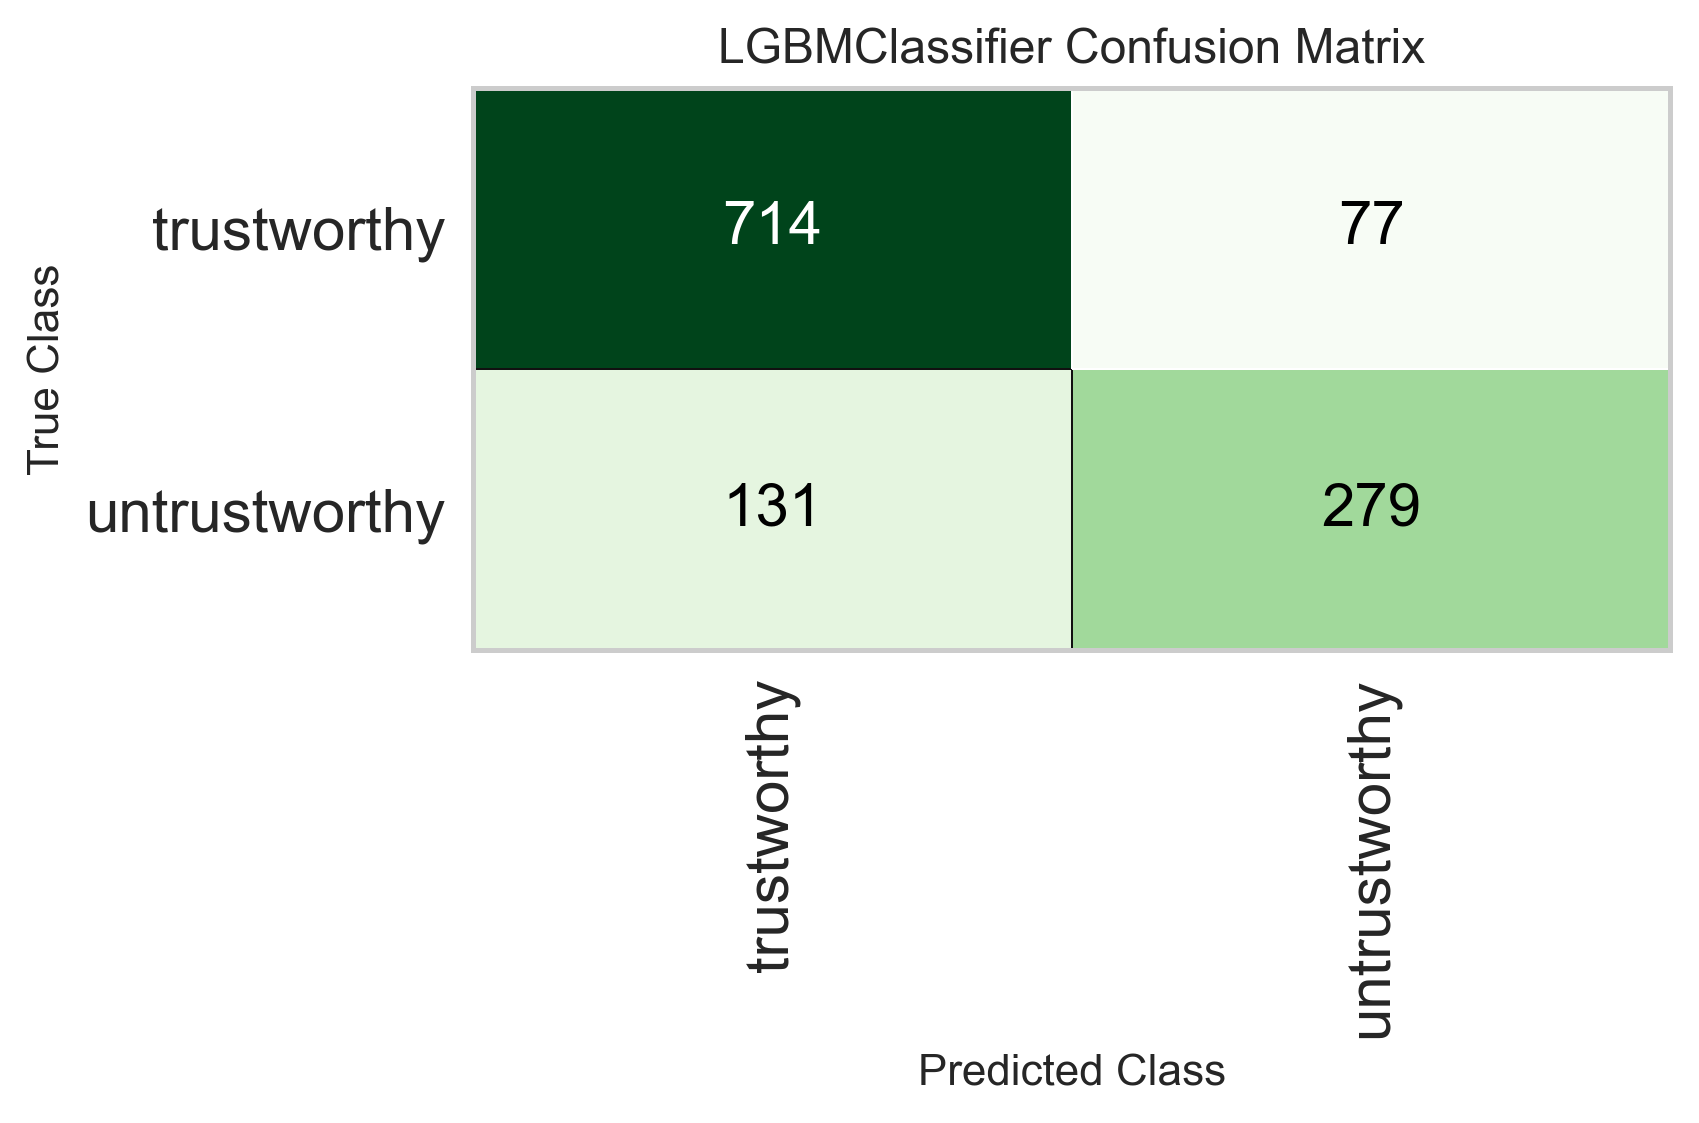

In [88]:
plot_model(tuned_bm, plot = 'confusion_matrix',scale=4)

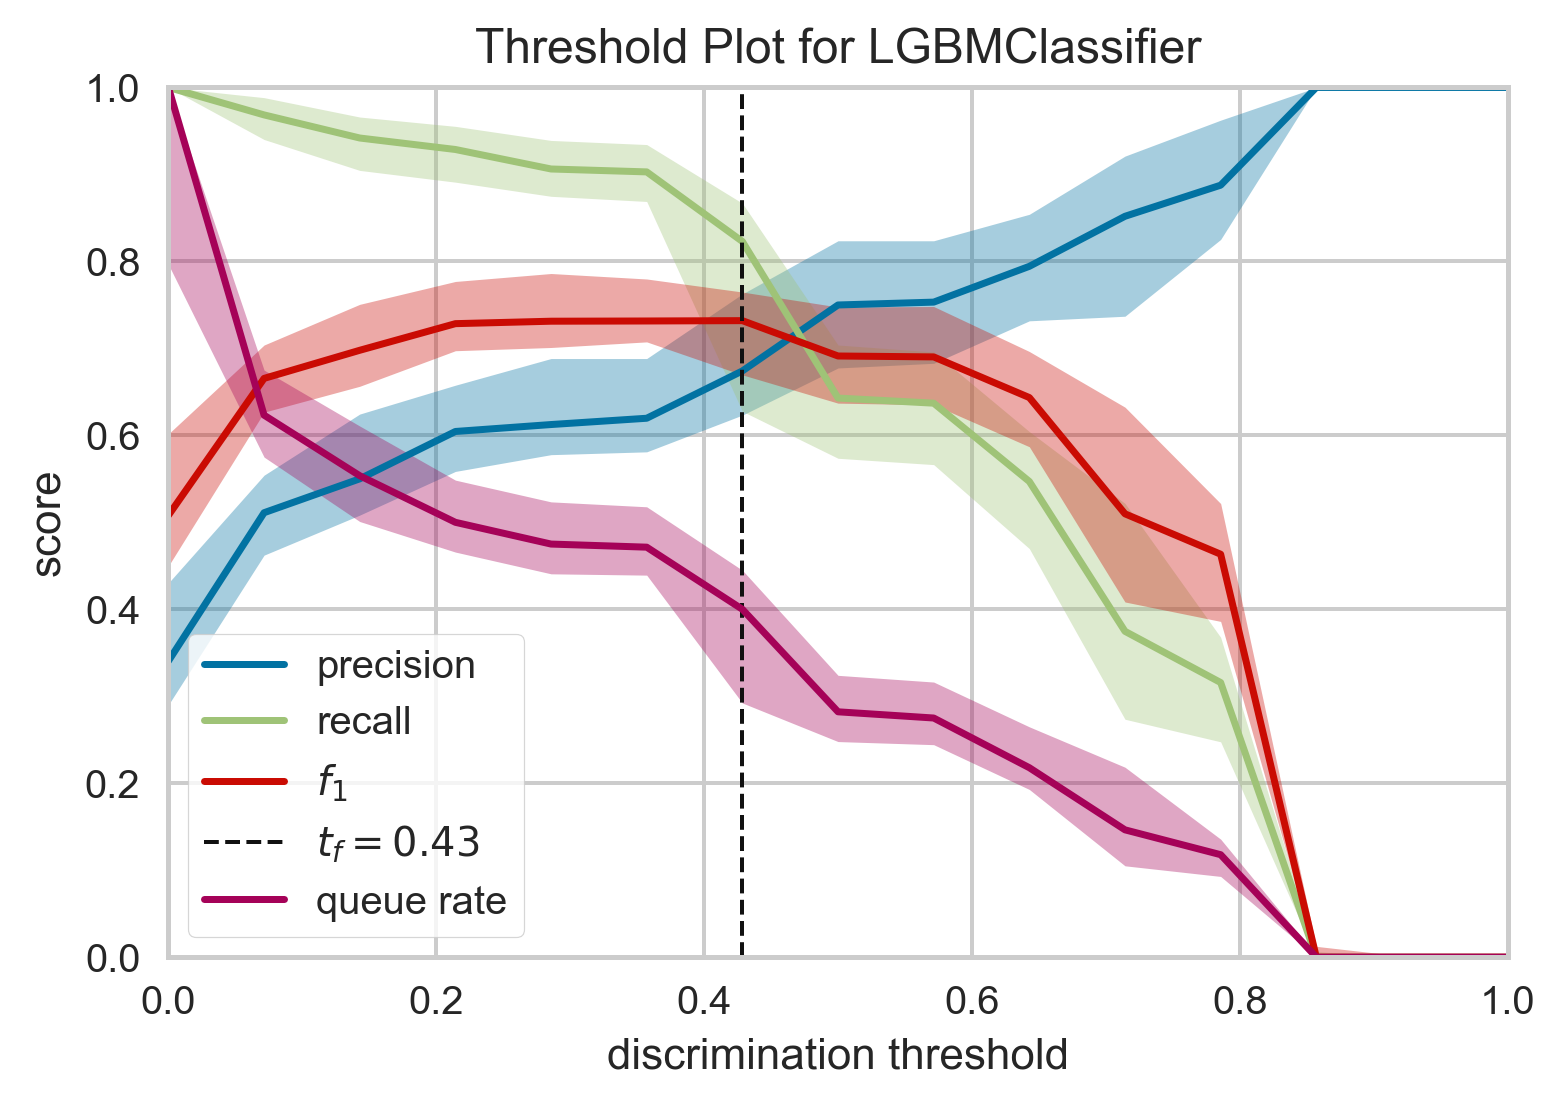

In [89]:
plot_model(tuned_bm, plot = 'threshold',scale=4)

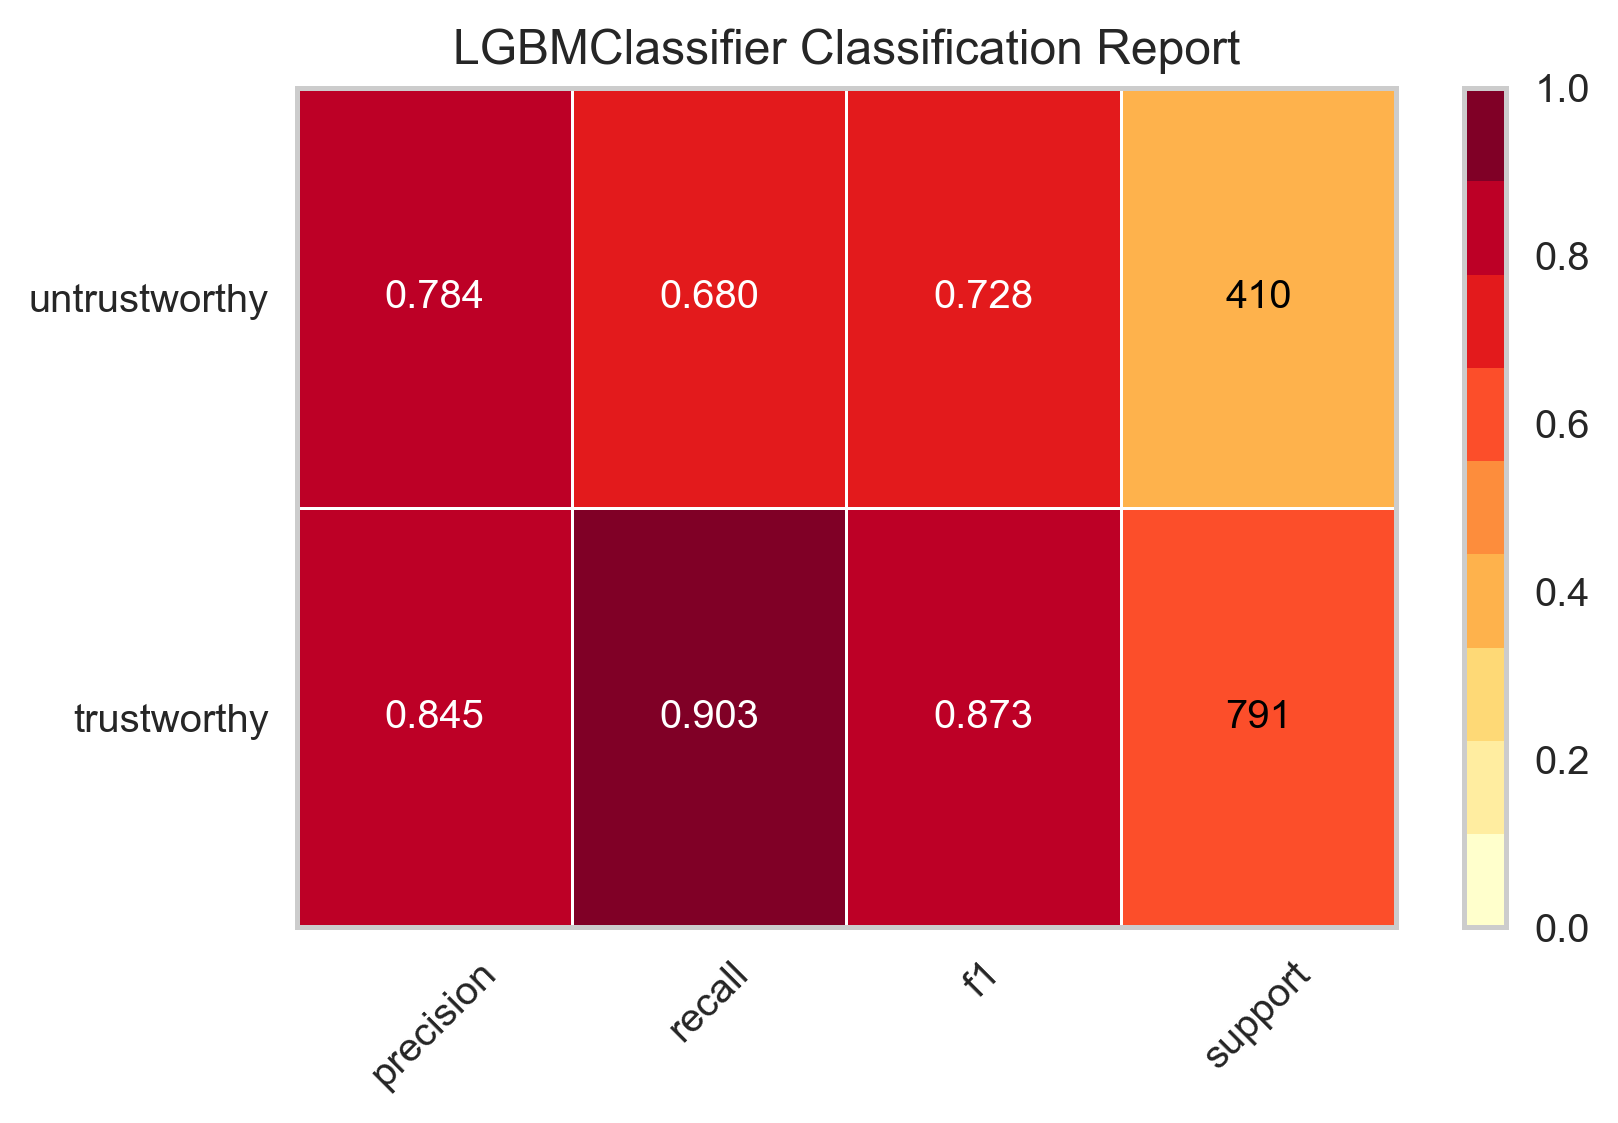

In [90]:
plot_model(tuned_bm, plot = 'class_report',scale=4)

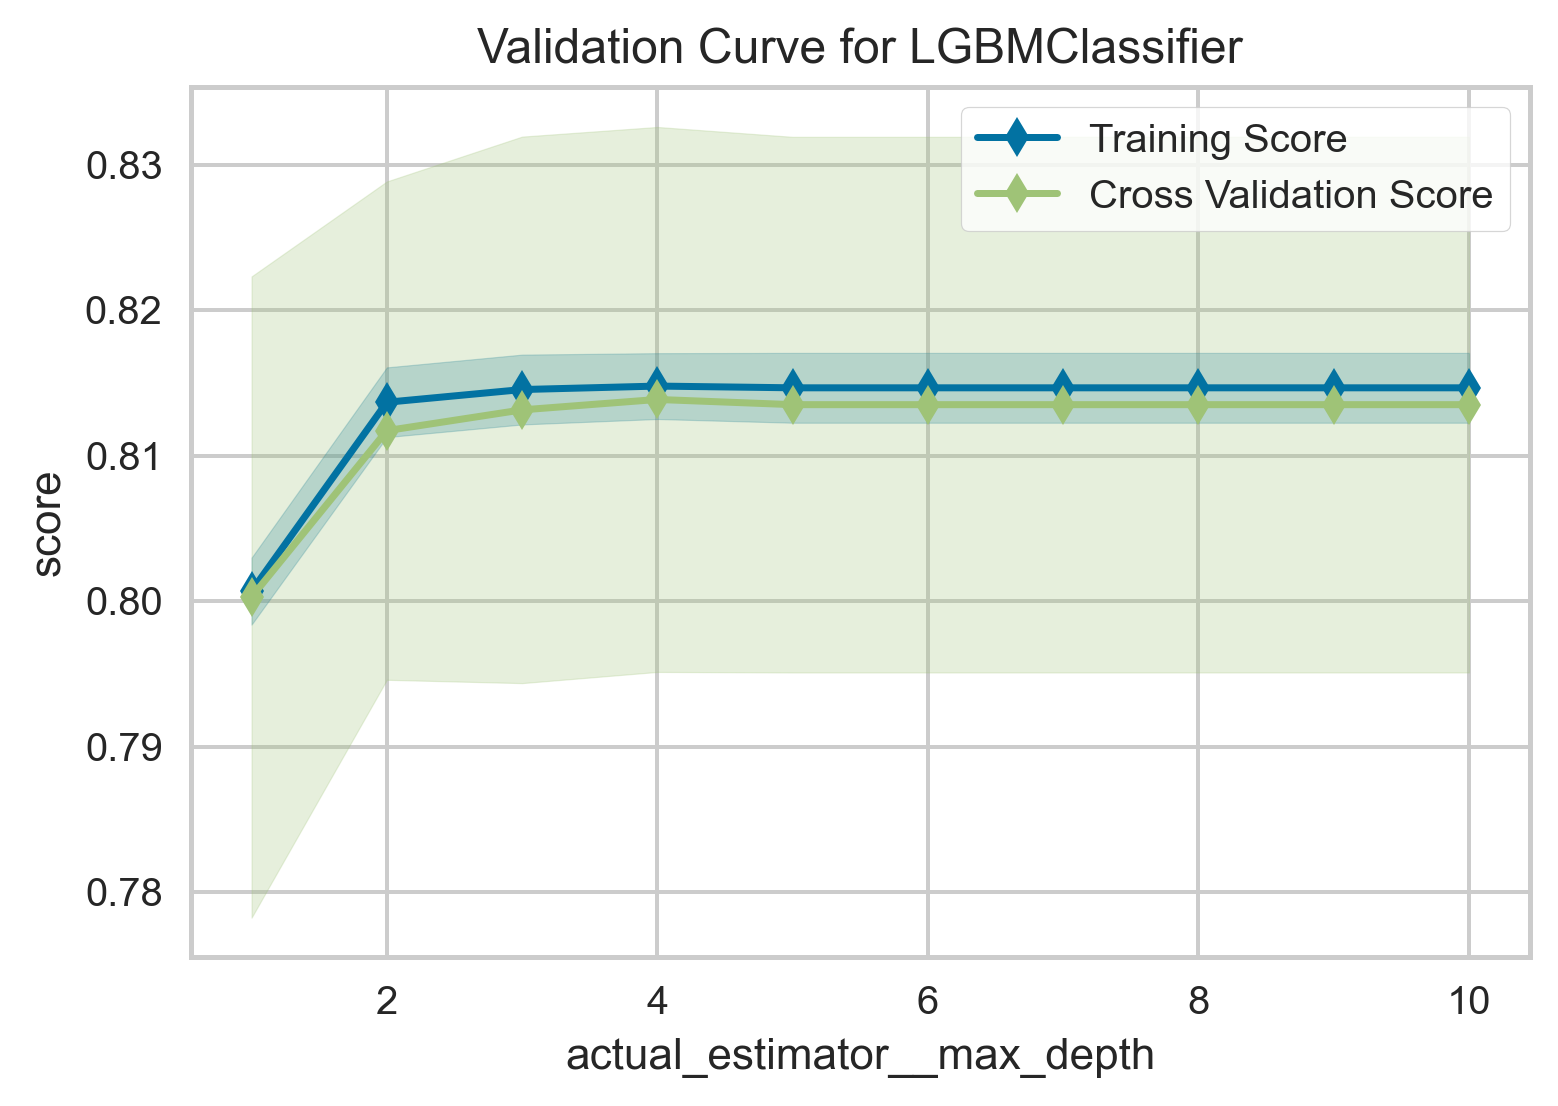

In [91]:
plot_model(tuned_bm, plot = 'vc',scale=4)

In [64]:
evaluate_model(tuned_bm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [72]:
interpret_model(tuned_bm,plot='reason')

In [70]:
predict_model(tuned_bm, round = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.83,0.90,0.68,0.78,0.73,0.60,0.61


,sensor1_CT_range_1,sensor1_CT_range_2,sensor1_CT_range_3,sensor1_CT_range_4,sensor2_*,sensor2_CU_range_1,sensor2_CU_range_4,sensor3_*,sensor3_LT_range_1,sensor3_LT_range_2,sensor3_LT_range_4,trustclass,Label,Score
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,untrustworthy,trustworthy,0.55
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,trustworthy,trustworthy,0.62
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,trustworthy,trustworthy,0.62
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,untrustworthy,untrustworthy,0.69
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,untrustworthy,untrustworthy,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,trustworthy,trustworthy,0.55
1197,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,trustworthy,trustworthy,0.96
1198,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,trustworthy,trustworthy,0.98
1199,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,untrustworthy,untrustworthy,0.85


In [76]:
calibrated_dt = calibrate_model(tuned_bm, round=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.78,0.87,0.60,0.68,0.64,0.48,0.48
1,0.83,0.90,0.69,0.78,0.73,0.61,0.61
2,0.82,0.90,0.70,0.76,0.73,0.60,0.60
3,0.84,0.91,0.66,0.80,0.73,0.61,0.62
4,0.82,0.89,0.67,0.75,0.71,0.58,0.58
5,0.80,0.86,0.60,0.74,0.66,0.52,0.53
6,0.81,0.88,0.61,0.76,0.67,0.54,0.55
7,0.81,0.87,0.64,0.76,0.69,0.56,0.57
8,0.83,0.90,0.68,0.77,0.72,0.60,0.60


In [77]:
best_lr_threshold = optimize_threshold(calibrated_dt,optimize='Recall')

In [78]:
evaluate_model(best_lr_threshold)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [92]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [93]:
sns.set_style('darkgrid')
colors = ['#851836', '#EDBD17', '#0E1428', '#407076', '#4C5B61']
sns.set_palette(sns.color_palette(colors))

<Figure size 432x288 with 0 Axes>

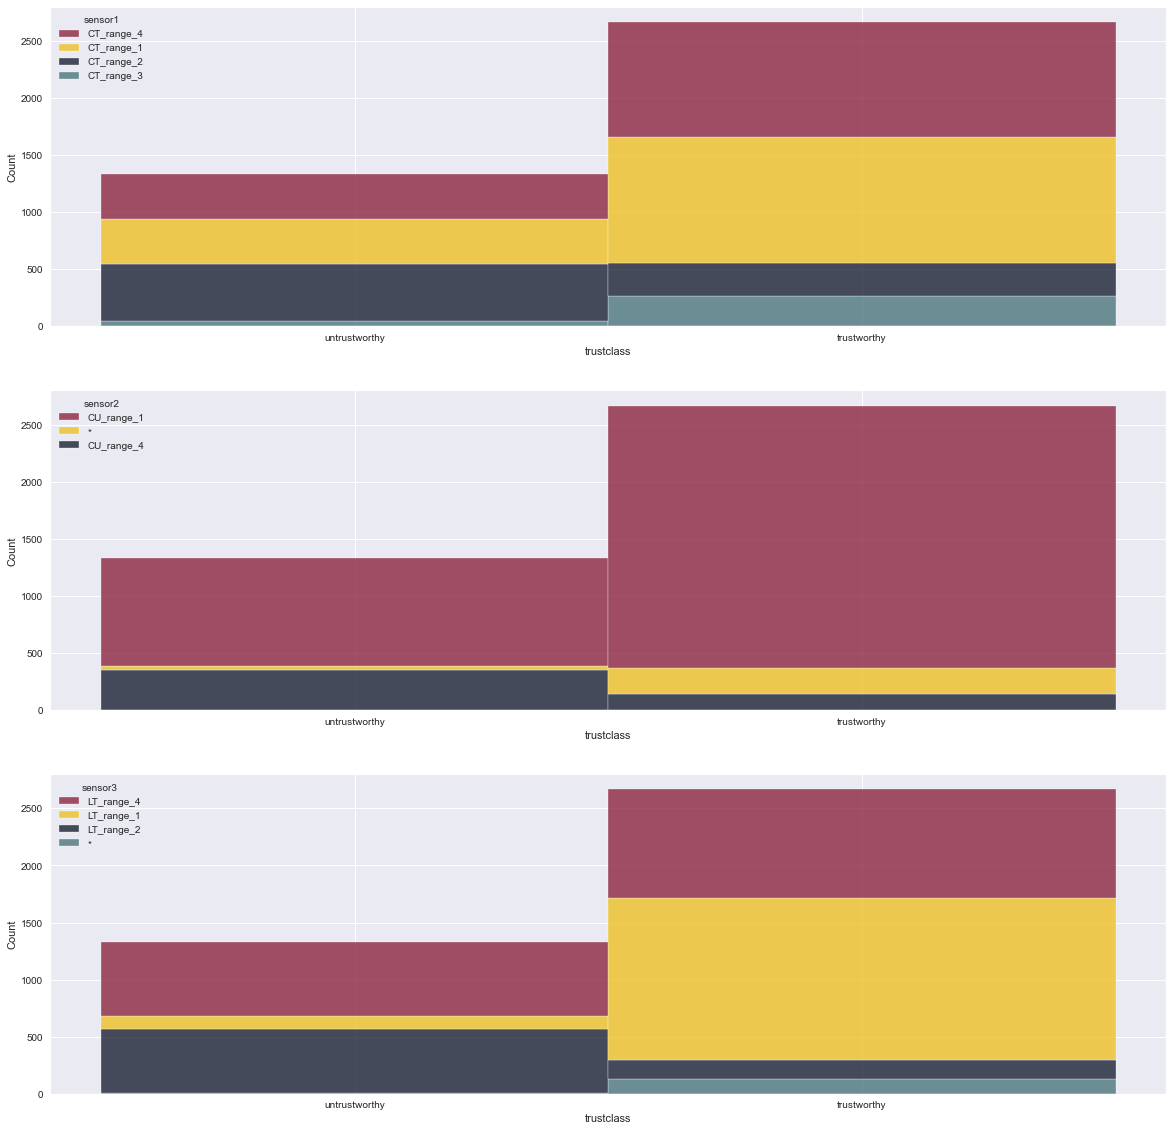

In [102]:
# numerical = ['bmi', 'age', 'charges']
# data[numerical].hist(bins=20, layout=(1, 3), figsize=(9,3))

plt.tight_layout()
categorical = ['sensor1', 'sensor2', 'sensor3']

fig, axs = plt.subplots(3, 1, figsize=(20,20))

for variable, ax in zip(categorical, axs.flatten()):
  sns.histplot(trust_data, x='trustclass', hue=variable, multiple='stack', ax=ax)
plt.savefig('eda.pdf')
plt.show()